Problem Defination:This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. 

Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

loading data set

In [2]:
ds=pd.read_csv("baseball.csv")

In [3]:
ds.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


# Checking Data type

In [5]:
ds.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

we have target and independent varibales of int type and only one input variable i.e.'ERA'is float type

# Checking null values

In [6]:
ds.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

data set have no missing values

<AxesSubplot:>

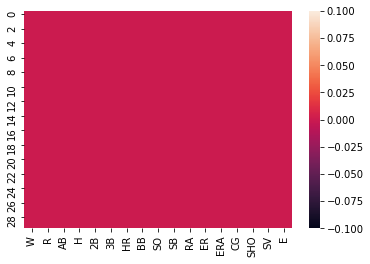

In [7]:
sns.heatmap(ds.isnull())

above heatmap shows that there is no missing values

In [8]:
ds.shape

(30, 17)

we have 30 rows and 17 columns

In [9]:
df=pd.DataFrame(ds)

In [10]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Stastical summary

In [11]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Checking Correlation

In [12]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

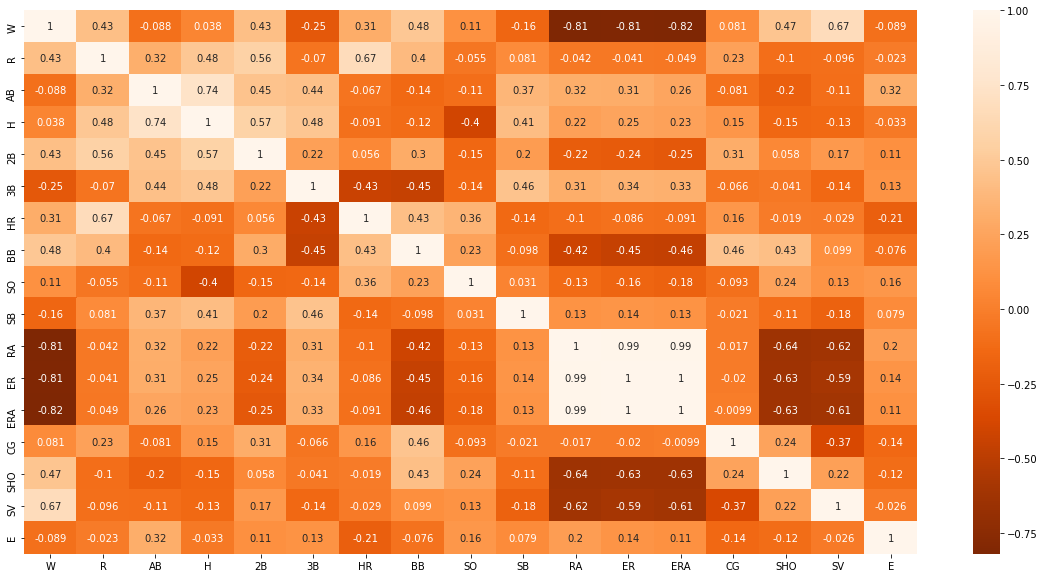

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Oranges_r')

above heatmap shows the correlation between targer variable i.e. 'W'and other input variables

In [14]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

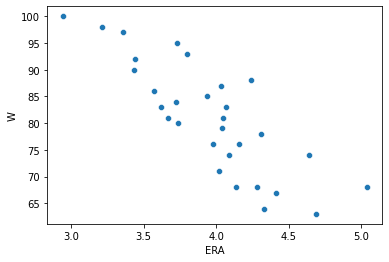

In [60]:
sns.scatterplot(df['ERA'],df['W'])
plt.show()

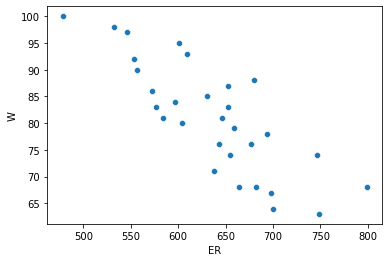

In [61]:
sns.scatterplot(df['ER'],df['W'])
plt.show()

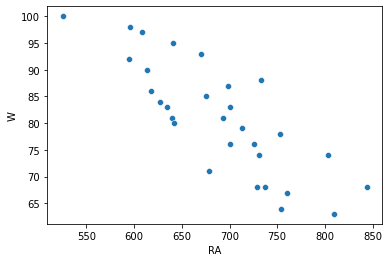

In [62]:
sns.scatterplot(df['RA'],df['W'])
plt.show()

Above 3 scatterplots show that there is strong negative correlation between target variable 'W'and input variables'ERA',"EA",'RA'

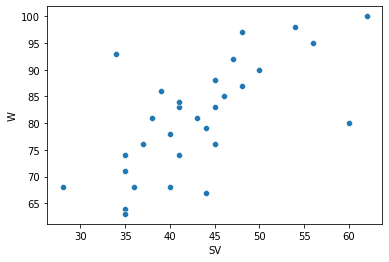

In [63]:
sns.scatterplot(df['SV'],df['W'])
plt.show()

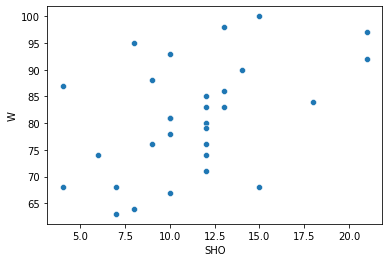

In [64]:
sns.scatterplot(df['SHO'],df['W'])
plt.show()

Above 2 scatterplot shows that there is positive corelationship between target varibale i.e.'W'and input variables i.e.'SV','SHO'

In [20]:
df['W'].value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

<AxesSubplot:xlabel='W', ylabel='count'>

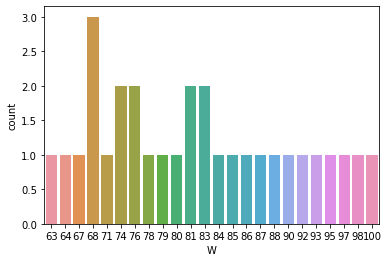

In [65]:
sns.countplot(df['W'])

above countplot of target variable shows the counting of different values of target variable

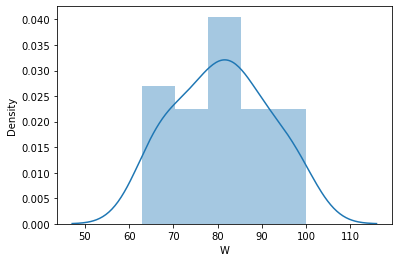

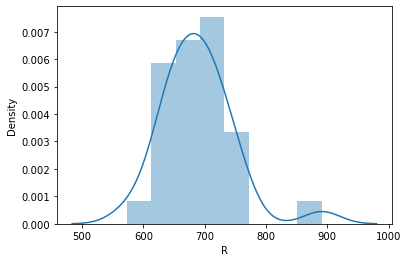

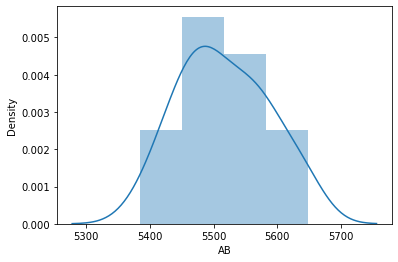

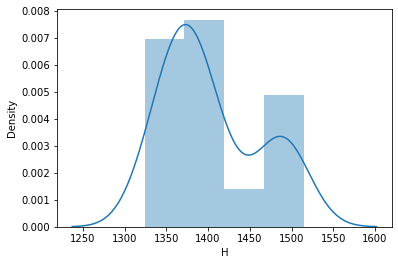

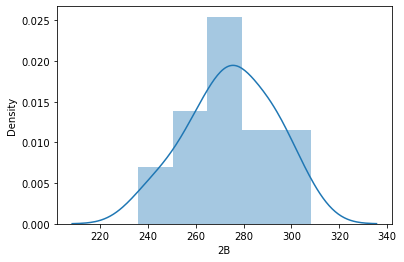

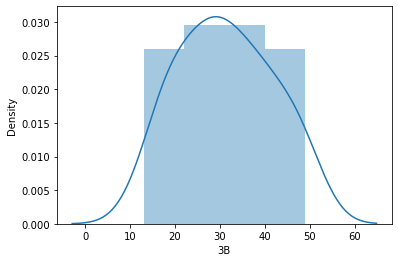

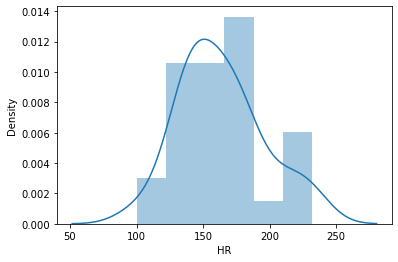

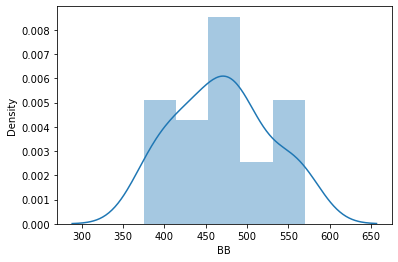

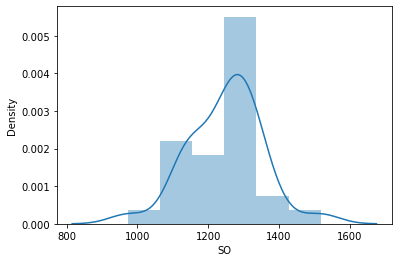

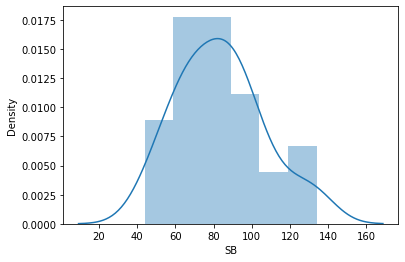

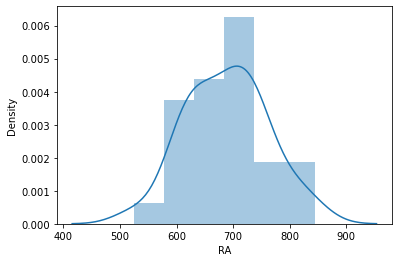

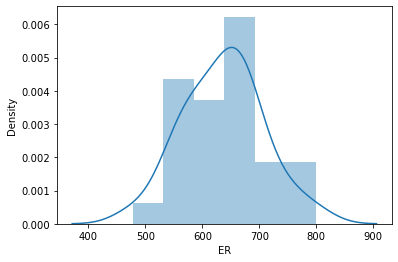

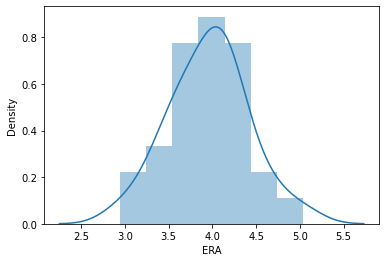

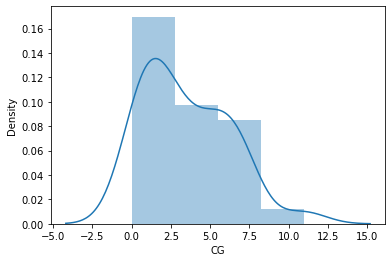

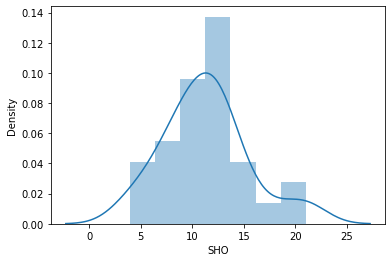

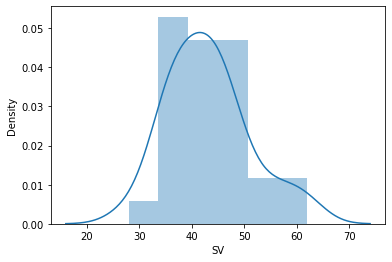

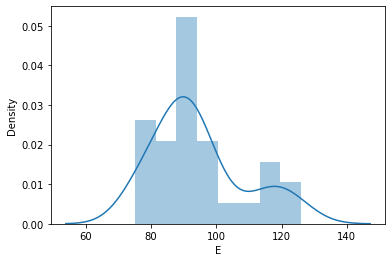

In [21]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

above distplot shows that there is left skewness present in data columns such as 'R','CG','E'

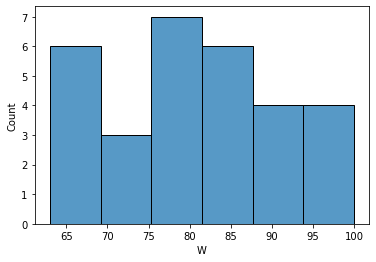

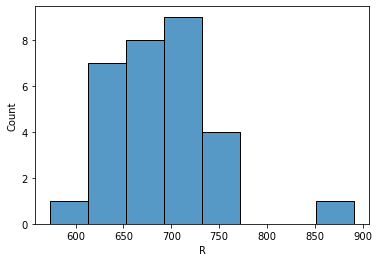

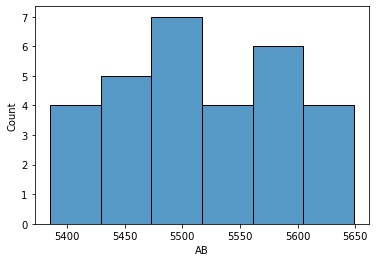

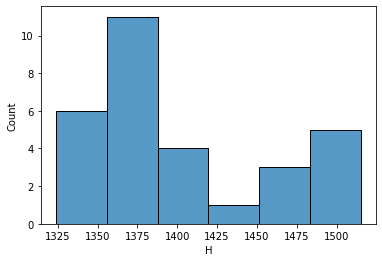

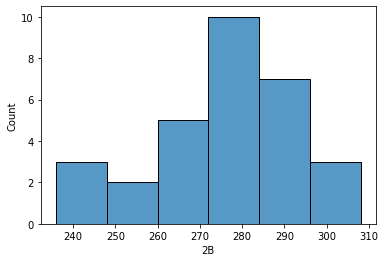

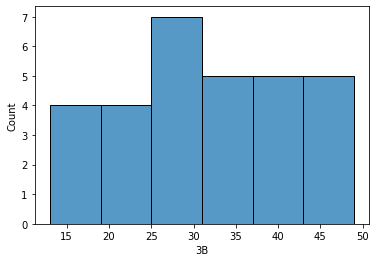

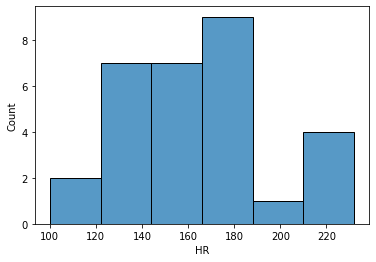

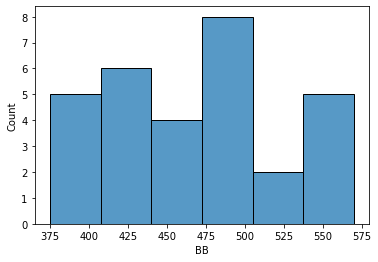

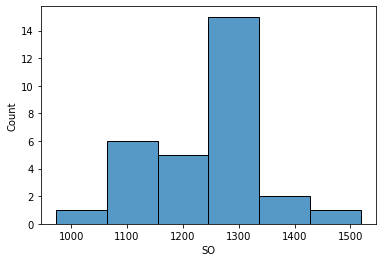

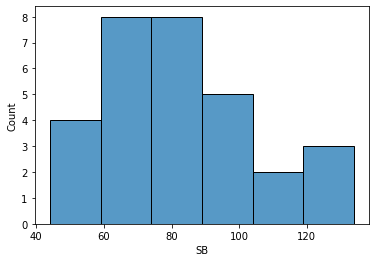

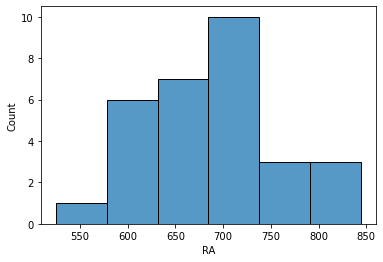

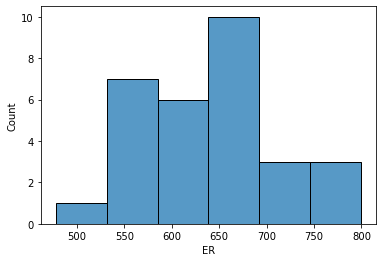

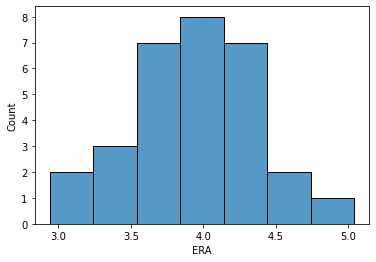

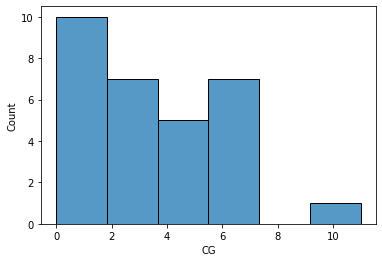

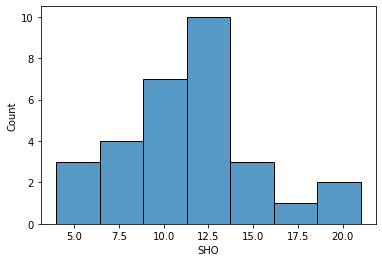

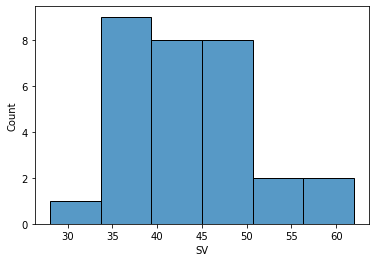

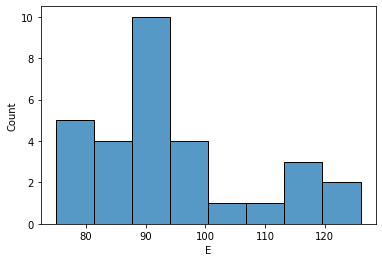

In [22]:
for i in df.columns:
    plt.figure()
    sns.histplot(df[i])

above histplot shows the frequencies of data of data set

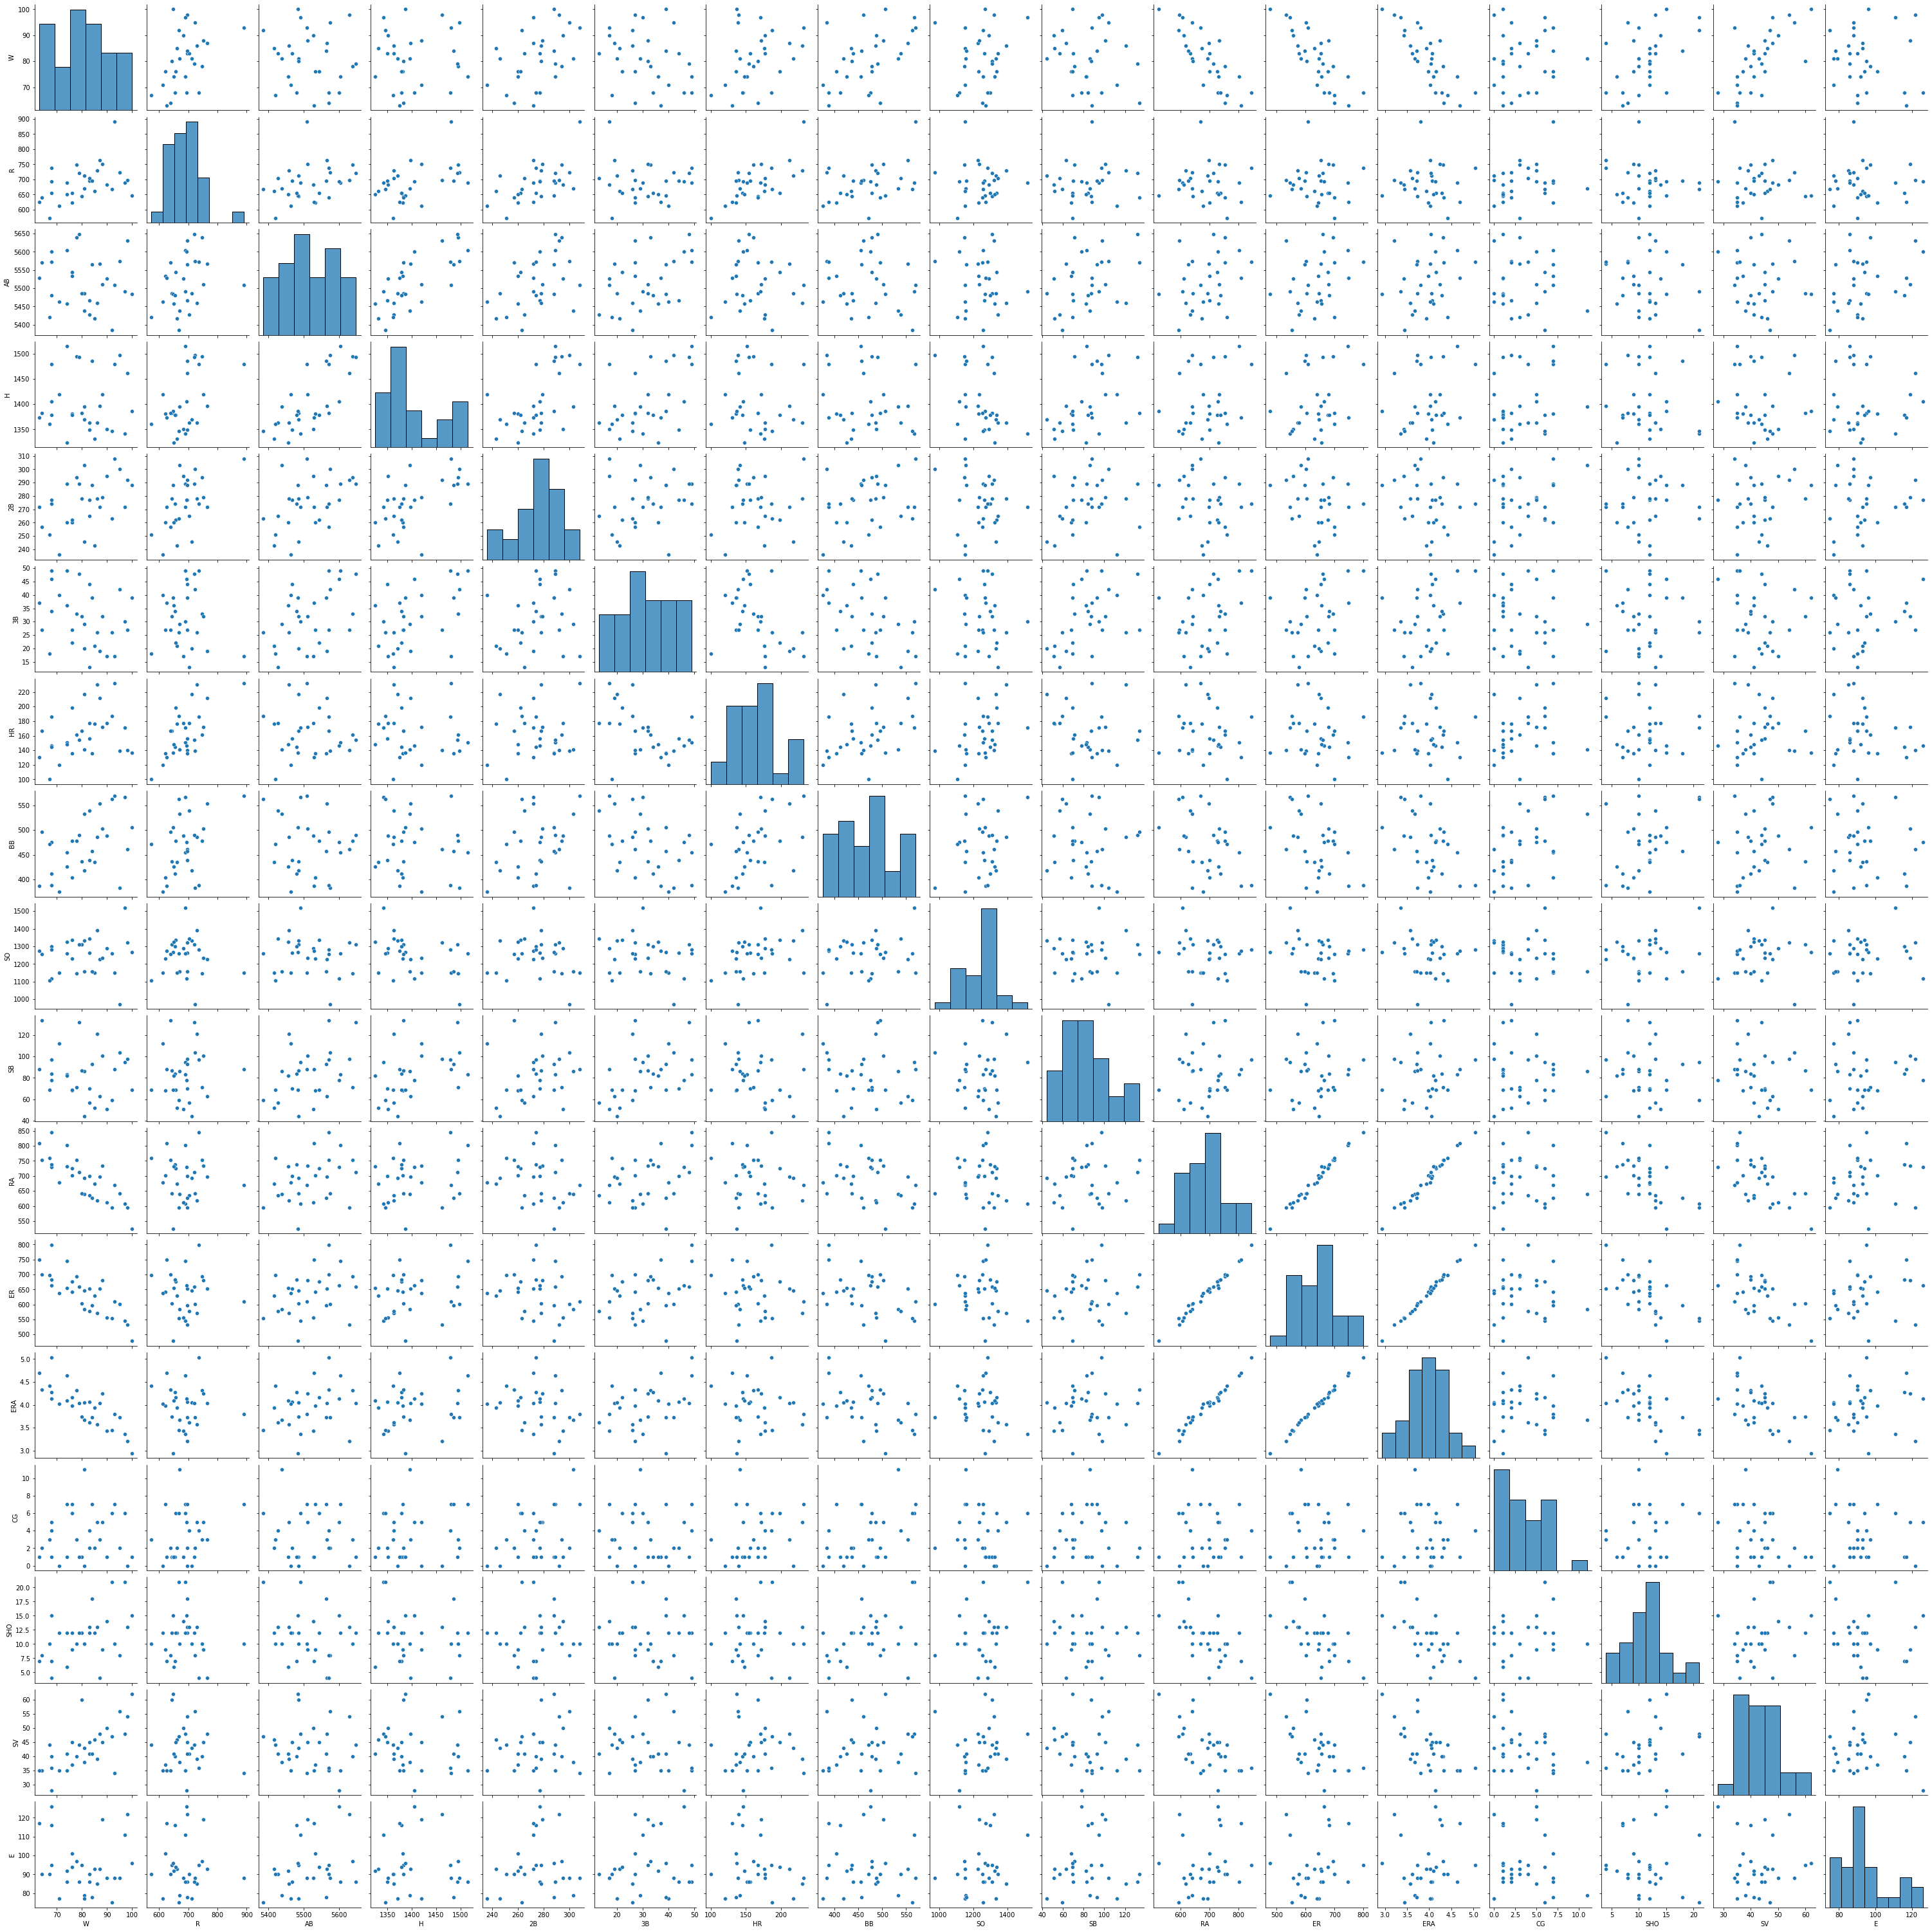

In [23]:
sns.pairplot(df)

W        AxesSubplot(0.125,0.125;0.0945122x0.755)
R     AxesSubplot(0.238415,0.125;0.0945122x0.755)
AB    AxesSubplot(0.351829,0.125;0.0945122x0.755)
H     AxesSubplot(0.465244,0.125;0.0945122x0.755)
2B    AxesSubplot(0.578659,0.125;0.0945122x0.755)
3B    AxesSubplot(0.692073,0.125;0.0945122x0.755)
HR    AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

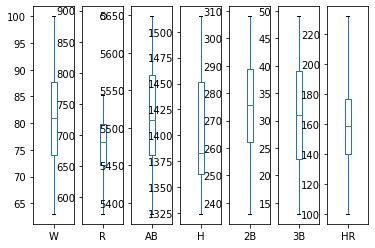

In [24]:

df.iloc[:,0:7].plot(kind='box',subplots=True,layout=(1,7))


BB        AxesSubplot(0.125,0.125;0.0731132x0.755)
SO     AxesSubplot(0.212736,0.125;0.0731132x0.755)
SB     AxesSubplot(0.300472,0.125;0.0731132x0.755)
RA     AxesSubplot(0.388208,0.125;0.0731132x0.755)
ER     AxesSubplot(0.475943,0.125;0.0731132x0.755)
ERA    AxesSubplot(0.563679,0.125;0.0731132x0.755)
CG     AxesSubplot(0.651415,0.125;0.0731132x0.755)
SHO    AxesSubplot(0.739151,0.125;0.0731132x0.755)
SV     AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

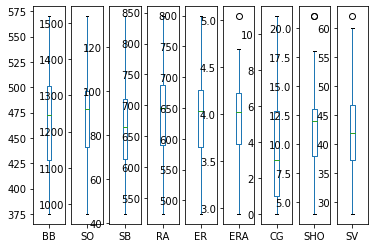

In [25]:
df.iloc[:,7:-1].plot(kind='box',subplots=True,layout=(1,9))

Above boxplot show that there are some outliers present in data set

In [26]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

some data columns have skewness

In [32]:
from scipy.stats import zscore

In [33]:
z=np.abs(zscore(df))

In [34]:
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [35]:
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [36]:
df_new=df[(z<3).all(axis=1)]

REmoved Outliers using zscore

In [133]:
print("shape of data before removing outliers",df.shape)
print("shape of data after removing outliers",df_new.shape)

shape of data before removing outliers (30, 17)
shape of data after removing outliers (29, 17)


In [39]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [109]:
cols=['CG','H','SV','E']

In [110]:
for i in df_new[cols]:
    df_new[i]=np.log(1+df_new[i])

In [111]:
df_new.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

removing skewness using np.log function

In [112]:
df_new.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636
1,83,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908
2,81,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,4.382027
3,76,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586,4.624973
4,74,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519,4.465908


Importing regression algorithms and error matrix

In [113]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge 

split data  into target variable and independent variable

In [114]:
x=df_new.drop('W',axis=1)
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636
1,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908
2,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,4.382027
3,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586,4.624973
4,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519,4.465908


In [115]:
y=df_new['W']
y.head()

0    95
1    83
2    81
3    76
4    74
Name: W, dtype: int64

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Standarlized data usning standard scaler

In [118]:
st=StandardScaler()

In [119]:
x_scaled=st.fit_transform(x)

In [120]:
x1=pd.DataFrame(x_scaled,columns=x.columns)

In [121]:
x1.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.959398,0.830084,1.723726,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.240415,-0.813262,1.554812,-0.435733
1,0.331147,-0.702831,-0.949846,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,-0.240415,0.159299,0.296229,-0.598110
2,-0.274666,-1.100253,-0.088700,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,1.815711,-0.326982,-0.672787,-1.197382
3,-1.329231,0.233951,-0.347747,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,1.214333,-0.570122,-0.825263,0.538291
4,0.174084,1.255894,2.030708,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,1.214333,0.159299,-1.142637,-0.598110


split data for traning and testing

In [142]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.25,random_state=42)

In [143]:
x_train.shape

(21, 16)

In [144]:
x_test.shape

(8, 16)

In [145]:
y_train.shape

(21,)

In [146]:
y_test.shape

(8,)

In [147]:
lg=LinearRegression()
sv=SVR()
dtr=DecisionTreeRegressor()
rf=RandomForestRegressor()
knn=KNeighborsRegressor()
l1=Lasso(normalize=False)
r1=Ridge()


In [148]:
list1=[lg,sv,dtr,rf,knn,l1,r1]
for i in list1:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print("Accuracy_Metrics",i)
    print("r2_score value",r2_score(y_test,pred))
    print("mean_absolute_error value",mean_absolute_error(y_test,pred))
    print("mean_squared_error value",mean_squared_error(y_test,pred))

Accuracy_Metrics LinearRegression()
r2_score value 0.7252657626091573
mean_absolute_error value 4.280044148617528
mean_squared_error value 30.203595223155766
Accuracy_Metrics SVR()
r2_score value 0.07442439588404581
mean_absolute_error value 8.940187273683113
mean_squared_error value 101.75546797749772
Accuracy_Metrics DecisionTreeRegressor()
r2_score value 0.2461625923820352
mean_absolute_error value 7.375
mean_squared_error value 82.875
Accuracy_Metrics RandomForestRegressor()
r2_score value 0.406898692438886
mean_absolute_error value 6.774999999999999
mean_squared_error value 65.20407499999997
Accuracy_Metrics KNeighborsRegressor()
r2_score value 0.4000682205798748
mean_absolute_error value 6.625000000000002
mean_squared_error value 65.95500000000001
Accuracy_Metrics Lasso()
r2_score value 0.7574246809749599
mean_absolute_error value 4.32553732568136
mean_squared_error value 26.668124135315352
Accuracy_Metrics Ridge()
r2_score value 0.829189767309418
mean_absolute_error value 3.3614

from above results we can conclude that Rigde Regression gives less errors as compared to other algorithms

In [155]:
from sklearn.model_selection import cross_val_score

In [156]:
for i in list1:
    scores=cross_val_score(i,x1,y,cv=5)
    print('scores of',i)
    print(scores)
    print(scores.mean())

scores of LinearRegression()
[ 0.5578333  -0.36011946  0.61092665 -0.22451215 -0.38019605]
0.040786458346371776
scores of SVR()
[-0.07918731 -1.19813214 -0.00688351 -0.40804882  0.20624061]
-0.2972022350274798
scores of DecisionTreeRegressor()
[-1.87386364e+00 -9.88157895e+00  2.92764534e-03 -3.22950820e-01
  4.36910377e-01]
-2.327711076141804
scores of RandomForestRegressor()
[ 0.4814725  -4.67244605  0.49760201  0.49613787  0.87406338]
-0.46463405836338606
scores of KNeighborsRegressor()
[ 0.00863636 -1.46526316  0.47636972  0.31416393  0.80165094]
0.027111560669320613
scores of Lasso()
[ 0.73540561 -0.70591176  0.75373286  0.78816503  0.8802995 ]
0.49033824821341054
scores of Ridge()
[ 0.52766054 -0.95441661  0.68648643  0.87632192  0.82267062]
0.3917445799642073


cross valau scores of all above models

# HyperParameterTunning

In [130]:
from sklearn.model_selection import GridSearchCV

In [131]:
r2=Ridge()
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(r2, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(x_train,y_train)
Ridge_GS.best_params_

{'alpha': 1, 'fit_intercept': True, 'solver': 'saga'}

In [132]:
r2=Ridge(alpha= 1, fit_intercept=True, solver= 'saga')
r2.fit(x_train,y_train)
rpred=r2.predict(x_test)
print("Accuracy_Metrics")
print("r2_score value",r2_score(y_test,rpred))
print("mean_absolute_error value",mean_absolute_error(y_test,rpred))
print("mean_squared_error value",mean_squared_error(y_test,rpred))

Accuracy_Metrics
r2_score value 0.8274175766993157
mean_absolute_error value 3.3765710596035063
mean_squared_error value 18.97328016161898


In [149]:
import joblib

In [150]:
joblib.dump(r2,'Baseball.obj')

['Baseball.obj']